# Дипломный проект «Python для анализа данных»

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [57]:
import pandas as pd
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
hr_stats = pd.read_csv('HR.csv')
hr_stats.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Задание 2

Рассчитайте основные статистики для переменных
(среднее, медиана, мода, мин/макс, сред.отклонение).

In [86]:
indicators_st = hr_stats.describe()
mode_st = hr_stats.iloc[:,:-2].mode().rename({0:'mode 1',1:'mode 2'})
pd.concat([indicators_st,mode_st])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode 1,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
mode 2,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN


### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [224]:
hr_stats.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


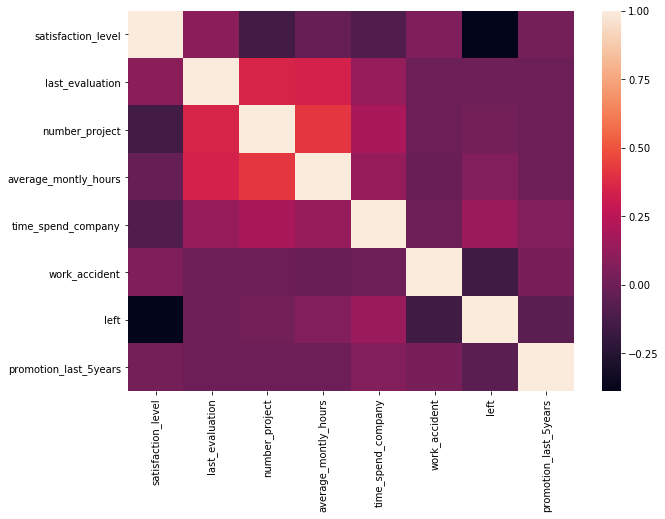

In [228]:
sns.heatmap(hr_stats.corr())

Две самые скоррелированные переменные - average_monthly_hours и number_project.  
Две наименее скоррелированные переменные - work_accident и time_spend_company

### Задание 4
Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [115]:
hr_count = hr_stats.pivot_table(index = 'department', values = 'salary', aggfunc = 'count', fill_value = 0)
hr_count.columns = ['Count']
hr_count = hr_count.sort_values('Count', ascending = False)
hr_count

,Count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [119]:
hr_count.sum()

Count    14999
dtype: int64

Text(0.5, 1.0, 'Количество сотрудников по департаментам')

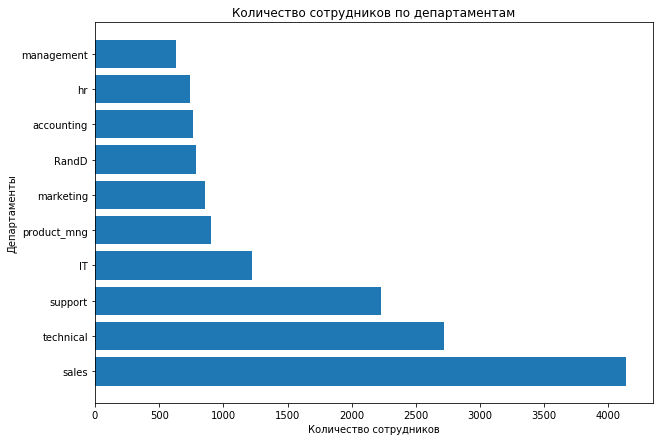

In [97]:
plt.barh(hr_count['department'], hr_count['Count'])
plt.xlabel('Количество сотрудников')
plt.ylabel('Департаменты')
plt.title('Количество сотрудников по департаментам')

Общее количество сотрудников, прошедших опрос уровня удовлетворенности, составляет 14 999 человек, из них:  
- Наибольшее количество сотрудников, прошедших опрос, работают в департаменте Sales
- Наименьшее количество сотрудников, прошедших опрос, работают в департаменте Management

### Задание 5
Показать распределение сотрудников по зарплатам.

In [190]:
salary_rate = ['low','medium','high']
hr_stats['salary'] = hr_stats['salary'].astype("category")
hr_stats['salary'].cat.set_categories(salary_rate, inplace=True)
hr_salary = pd.DataFrame(hr_stats['salary'].value_counts())
hr_salary.columns = ['count']
hr_salary

,count
low,7316
medium,6446
high,1237


In [191]:
hr_salary_p = pd.DataFrame(hr_stats['salary'].value_counts(normalize=True)*100)
hr_salary_p.columns = ['count']
hr_salary_p

,count
low,48.776585
medium,42.976198
high,8.247216


Text(0.5, 1.0, 'Распределение сотрудников по зарплате')

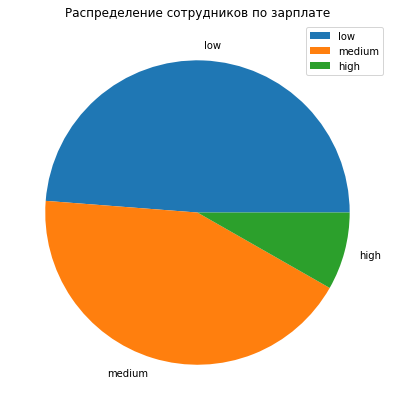

In [192]:
hr_salary.plot(kind='pie', y='count')
plt.ylabel('')
plt.title('Распределение сотрудников по зарплате')

Уровень зарплат большинства сотрудников компании ниже среднего уровня. 

Возможные причины:
1. Низкая автоматизация процессов, для выполнения которых требуется большое количество сотрудников с низким уровнем зарплаты
2. Высокая автоматизация процессов, для выполнения которых не трубется высокий уровень компетенции сотрудников

Возможные последствия:
1. Увеличивается вероятность постоянной текучки кадров 
2. Снижается уровень компетенции сотрудников.

### Задание 6
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [176]:
salary_rate = ['low','medium','high']
hr_stats['salary'] = hr_stats['salary'].astype("category")
hr_stats['salary'].cat.set_categories(salary_rate, inplace=True)
hr_salary_dep = hr_stats.groupby(['department','salary']).count()[['satisfaction_level']].sort_values(['department','salary'])
hr_salary_dep.columns = ['count']
hr_salary_dep

count
department  salary       
IT          low       609
            medium    535
            high       83
RandD       low       364
            medium    372
            high       51
accounting  low       358
            medium    335
            high       74
hr          low       335
            medium    359
            high       45
management  low       180
            medium    225
            high      225
marketing   low       402
            medium    376
            high       80
product_mng low       451
            medium    383
            high       68
sales       low      2099
            medium   1772
            high      269
support     low      1146
            medium    942
            high      141
technical   low      1372
            medium   1147
            high      201

Text(0.5, 1.0, 'Распределение сотрудников департаментов по уровню зарплаты ')

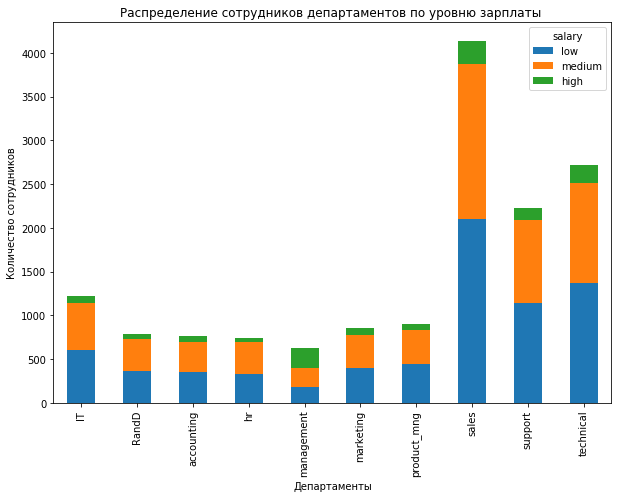

In [180]:
hr_salary_dep.unstack()['count'].plot.bar(stacked=True)
plt.xlabel('Департаменты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников департаментов по уровню зарплаты ')

Text(0.5, 1.0, 'Соотношение уровня зарплат в департаментах компании')

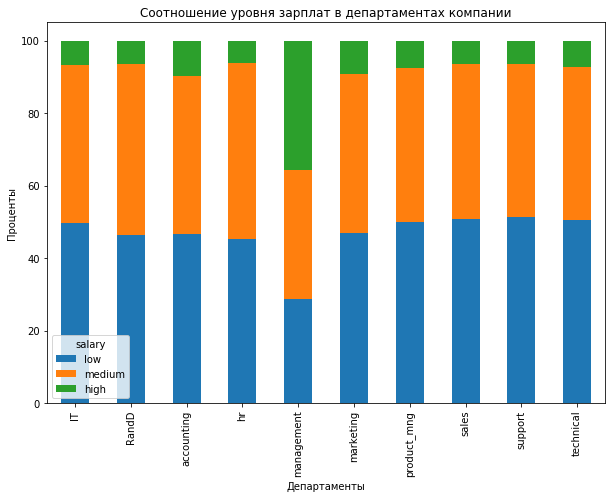

In [181]:
hr_dep = pd.DataFrame(hr_stats['department'].value_counts()).reset_index()
hr_dep.columns = ['department','count_t']
hr_dep_salary_t = (hr_salary_dep.reset_index().merge(hr_dep, how='left', on='department'))
hr_dep_salary_t['part'] = hr_dep_salary_t['count']/hr_dep_salary_t['count_t']*100
hr_dep_salary_t.set_index
hr_dep_salary_p = hr_dep_salary_t[['department','salary','part']].groupby(['department','salary']).sum()
hr_dep_salary_p.unstack()['part'].plot(kind='bar', stacked=True)
plt.xlabel('Департаменты')
plt.ylabel('Проценты')
plt.title('Соотношение уровня зарплат в департаментах компании')

Независимо от количества сотрудников в департаменте соотношение уровней зарплаты по департаментампримерно на одном уровне и соответствует сотношению уровню зарплат в целом по компании (задание №6). Исключением является соотношение уровней зарплат в депаратменте Management, где соотношение работников с высоким уровнем дохода значительно превышает соотношение по компании. 

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

H0: Количество часов на рабочем месте в месяц у сотрудников в высокой и низкой зарплатой одинаковое  
H1: Количество часоа на рабочем месте в месяц у сотрудников в высокой и низкой зарплатой различается

In [319]:
from scipy import stats as st
alpha = 0.05

hr_high = hr_stats[hr_stats.salary == 'high'][['average_montly_hours']]
hr_low = hr_stats[hr_stats.salary == 'low'][['average_montly_hours']]

result = st.ttest_ind(hr_high, hr_low, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Сотрудники с высокой заработной платой и низкой зарплатой работают разное количество часов.')
else:
    print('Не отвергаем нулевую гипотезу. Сотрудники с высокой и низкой зарплатой работают по времени одинаково')


Ttest_indResult(statistic=array([-0.76243317]), pvalue=array([0.44590455]))
Не отвергаем нулевую гипотезу. Сотрудники с высокой и низкой зарплатой работают по времени одинаково


Таким образом, гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, не подтверждается.

In [216]:
hr_stats.groupby(['salary']).mean()[['average_montly_hours']]

,average_montly_hours
salary,
low,200.996583
medium,201.338349
high,199.867421


### Задание 8
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):  
- Доля сотрудников с повышением за последние 5 лет  
- Средняя степень удовлетворенности  
- Среднее количество проектов

In [109]:
hr_stats_left_1 = pd.DataFrame(hr_stats['left'].value_counts(normalize=True)*100).reset_index()
hr_stats_left_1.columns = ['left','production_part']

In [110]:
hr_stats_left_2 = hr_stats.groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean'}).reset_index()
hr_stats_left_2.columns = ['left','satisfaction_mean','projects_mean']

In [111]:
hr_stats_left_1.merge(hr_stats_left_2, how='inner')

,left,production_part,satisfaction_mean,projects_mean
0,0,76.191746,0.666810,3.786664
1,1,23.808254,0.440098,3.855503


Чем больше у сотрудника уровень удовлетворенности работой, тем меньше вероятность ухода сотрудника из компании.
При наличии повышения сотрудника в течение 5 лет вероятность ухода сотрудника из компании снижается.
Наличие и количество проектов у сотрудника не влияет на вероятность ухода сотрудника из компании.

### Задание 9
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [22]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(hr_stats.iloc[:,:-2], test_size=0.2)

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 14278 to 1533
Data columns (total 8 columns):
satisfaction_level       11999 non-null float64
last_evaluation          11999 non-null float64
number_project           11999 non-null int64
average_montly_hours     11999 non-null int64
time_spend_company       11999 non-null int64
work_accident            11999 non-null int64
left                     11999 non-null int64
promotion_last_5years    11999 non-null int64
dtypes: float64(2), int64(6)
memory usage: 843.7 KB


In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 8377 to 2318
Data columns (total 8 columns):
satisfaction_level       3000 non-null float64
last_evaluation          3000 non-null float64
number_project           3000 non-null int64
average_montly_hours     3000 non-null int64
time_spend_company       3000 non-null int64
work_accident            3000 non-null int64
left                     3000 non-null int64
promotion_last_5years    3000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 210.9 KB


In [25]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [27]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [28]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [214]:
result.head(15)

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [33]:
lda.coef_

array([[-4.55613545,  0.7381629 , -0.24956328,  0.00457597,  0.23324565,
        -1.08349329, -1.12363097]])

In [207]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test.values, lda.predict(data_test))).T

,0,1
0,2102,512
1,213,173


In [199]:
# Confusion Matrix Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test.values, lda.predict(data_test)))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2315
           1       0.45      0.25      0.32       685

    accuracy                           0.76      3000
   macro avg       0.63      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



Тестовая модель приняла верное решение 2 275 раз, неверное решение - 725 раз, т.е. в 76% случаев решение принято правильно. 

При этом:
1. В сравнении с прогнозными данными в 80% случаев модель приняла верное решение, что сотрудник не уволился, в 45% случаев - сотрудник уволился
2. В сравнении с фактическими данными в 91% случаев модель приняла верное решение, что сотрудник не уволился, в 25% случаев - сотрудник уволился  

Таким образом, в среднем модель определяет, что сотрудник не уволился с вероятностью 85%, сотрудник уволился - с вероятностью 32%. Средневзвешенная точность и полнота модели составляет 73%.


### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку

https://github.com/IrinaYakovlevaRu/NetologyPython/tree/master/Diploma